In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# **Steps**


1.   Getting Data
2.   Defining the model, the loss and the optimizer
3.   Converting the data to tensors
4.   Train:
* Zero the gradient (**optimizer**.zero_grad())
* Forward pass, loss computation (model(inputs), **criterion**(model_parameters(), lr=0.1)
* Backward pass, step (**loss**.backward(), **optimizer**.step())
5.   Predict:  model(inputs).detach().numpy()






# **Generating Data**

[-2.5159785   1.43710958  3.04923154  2.60656338 -0.30158488 -0.86960955
  4.83347018  4.89451818  1.54078158  2.27875868 -1.2380671   3.03926137
 -4.72859402 -1.20026738 -2.5165712  -3.11262336 -1.18224121 -4.17811298
 -0.57597965  2.35960929]


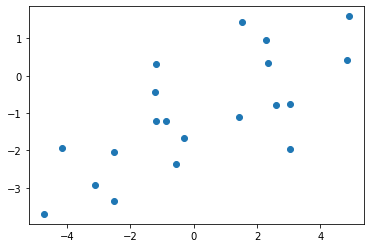

In [2]:
N = 20
X = np.random.random(N)*10-5
print(X)
y = 0.5 * X - 1 + np.random.randn(N) # slope = .5; intercept = -1; Gaussian Noise with mean 0 and var = 1 => MSE is the correct loss function to use
plt.scatter(X,y)

# **PyTorch**

In [3]:
model = nn.Linear(1,1)

In [ ]:
# Loss and optimizer
criterien = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [ ]:
# Reshaping and converting to float32, then to tensors
X = X.reshape(N,1)
y = y.reshape(N,1)

inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(y.astype(np.float32))
print(X)

[[-1.3507625 ]
 [ 3.33231328]
 [-3.27476095]
 [ 0.8713295 ]
 [ 2.15616074]
 [-4.76816234]
 [ 0.96336456]
 [-3.95086294]
 [-0.48482886]
 [-0.5162552 ]
 [-0.0165855 ]
 [ 1.36862355]
 [ 2.90075711]
 [ 0.49459754]
 [-4.27326734]
 [ 1.17505179]
 [-0.91305804]
 [ 2.36996549]
 [ 0.60724818]
 [ 0.3008591 ]]


In [ ]:
type(inputs)

torch.Tensor

In [ ]:
# train
n_epochs = 30
losses = []

for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad() # pytorch accumulates gradients when calling backward(), we prevent that here

  # forward pass
  outputs = model(inputs) # we use the model as a function
  loss = criterien(outputs, targets)

  # calculate loss
  losses.append(loss.item())

  # backward and optimize
  loss.backward() # calculates the gradient
  optimizer.step() # step of gd

  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')  

Epoch 1/30, Loss: 3.4479
Epoch 2/30, Loss: 1.6496
Epoch 3/30, Loss: 1.2673
Epoch 4/30, Loss: 1.0247
Epoch 5/30, Loss: 0.8691
Epoch 6/30, Loss: 0.7692
Epoch 7/30, Loss: 0.7052
Epoch 8/30, Loss: 0.6641
Epoch 9/30, Loss: 0.6377
Epoch 10/30, Loss: 0.6207
Epoch 11/30, Loss: 0.6099
Epoch 12/30, Loss: 0.6029
Epoch 13/30, Loss: 0.5984
Epoch 14/30, Loss: 0.5956
Epoch 15/30, Loss: 0.5937
Epoch 16/30, Loss: 0.5925
Epoch 17/30, Loss: 0.5918
Epoch 18/30, Loss: 0.5913
Epoch 19/30, Loss: 0.5910
Epoch 20/30, Loss: 0.5908
Epoch 21/30, Loss: 0.5907
Epoch 22/30, Loss: 0.5906
Epoch 23/30, Loss: 0.5905
Epoch 24/30, Loss: 0.5905
Epoch 25/30, Loss: 0.5905
Epoch 26/30, Loss: 0.5904
Epoch 27/30, Loss: 0.5904
Epoch 28/30, Loss: 0.5904
Epoch 29/30, Loss: 0.5904
Epoch 30/30, Loss: 0.5904


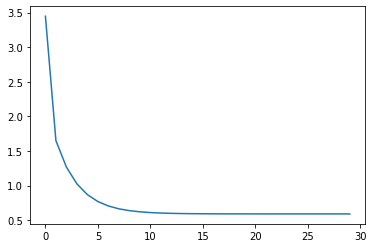

In [ ]:
plt.plot(losses)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

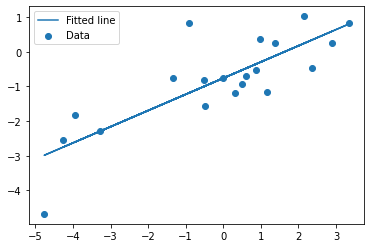

In [ ]:
predictions = model(inputs).detach().numpy() # detach() is used to detach the gradient from the tensor (avoids error)
plt.scatter(X, y, label='Data')
plt.plot(X, predictions, label='Fitted line')
plt.legend()
plt.plot

In [ ]:
# other way
with torch.no_grad():
  out = model(inputs).numpy()
out

array([[-1.3916571 ],
       [ 0.79756755],
       [-2.2910798 ],
       [-0.35288286],
       [ 0.24774474],
       [-2.989209  ],
       [-0.3098587 ],
       [-2.607141  ],
       [-0.9868541 ],
       [-1.0015451 ],
       [-0.7679616 ],
       [-0.12040997],
       [ 0.5958254 ],
       [-0.52899593],
       [-2.7578573 ],
       [-0.21090001],
       [-1.1870408 ],
       [ 0.34769326],
       [-0.47633448],
       [-0.61956394]], dtype=float32)

In [ ]:
# printing weight and bias
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w,b)

[[0.4674758]] [-0.7602083]
